In [1]:
# Import packages to use
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams.update({'errorbar.capsize': 2})

//anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Define the file to explore
file='resumen_N100_Niter1000000_beta1.0_dt1e-07_lf1.0_stf50_freediffusion_Nsimstot2000_mul1.csv'

# Define the parameters for the simulation
N=100
beta=1.0
s=1.0
nu=-1/(beta+1)

# Import the data file
df=pd.read_csv(file, engine='python')
print(df.columns.tolist())
print('Theoretical exponent (nu)= %g'%nu)

['t', 'log_t', 'N_avg', 'std_N', 'log_N']
Theoretical exponent (nu)= -0.5


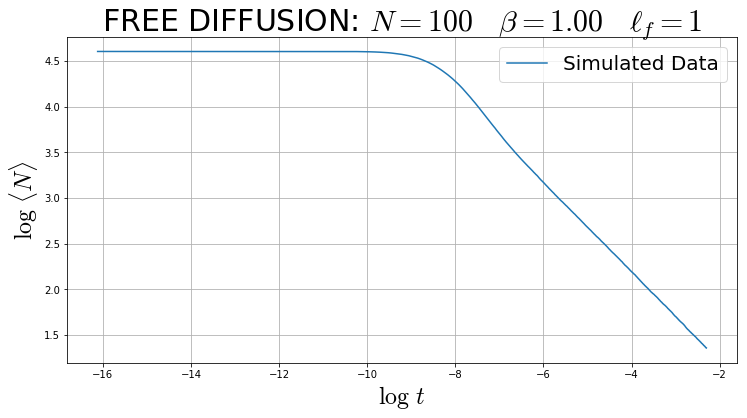

In [3]:
# Plot the entire log-data 
plt.figure(figsize=(12,6))

plt.plot(df.log_t,df.log_N, label='Simulated Data')

plt.xlabel(r'$\log \ t$',fontsize=24)
plt.ylabel(r'$\log \ \langle N \rangle $',fontsize=24)

plt.title(r'FREE DIFFUSION: $N=%i \quad \beta=%.2f \quad \ell_f=%g$'%(N,beta,s),fontsize=30)
plt.grid(zorder=3)
plt.legend(fontsize=20)
plt.show()
plt.close()

In [4]:
# Cut the data in order to analyze the last part
# The cut-value can be changed and will change the results
cut=-5
cut2=-1
df_tail=df[(df['log_t']>cut) & (df['log_t']<cut2)]

# LINEAR REGRESSION FOR MEAN VALUE

In [5]:
# Perform the linear regression for the asymptotic behaviour of the mean values
X=df_tail['log_t']
y=df_tail['log_N']

X = sm.add_constant(X)
model=sm.OLS(y,X)
results=model.fit()
nu_res=results.params[1]

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  log_N   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.919e+10
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        16:18:40   Log-Likelihood:             4.3556e+06
No. Observations:              932620   AIC:                        -8.711e+06
Df Residuals:                  932618   BIC:                        -8.711e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2229   1.13e-05   1.97e+04      0.0

## LINEAR REGRESSION FOR UPPER BOUND

In [6]:
# Perform the linear regression for the upper bound of the data
X=df_tail['log_t']
y=np.log(df_tail['N_avg']+df_tail['std_N'])

X = sm.add_constant(X)
model=sm.OLS(y,X)
results=model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.451e+09
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        16:18:41   Log-Likelihood:             4.0230e+06
No. Observations:              932620   AIC:                        -8.046e+06
Df Residuals:                  932618   BIC:                        -8.046e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6718   1.61e-05   4.16e+04      0.0

## LINEAR REGRESSION FOR LOWER BOUND

In [7]:
# Perform the linear regression for the lower bound of the data
X=df_tail['log_t']
y=np.log(df_tail['N_avg']-df_tail['std_N'])

X = sm.add_constant(X)
model=sm.OLS(y,X)
results=model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.800e+09
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        16:18:42   Log-Likelihood:             3.2825e+06
No. Observations:              932620   AIC:                        -6.565e+06
Df Residuals:                  932618   BIC:                        -6.565e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4890   3.57e-05  -1.37e+04      0.0

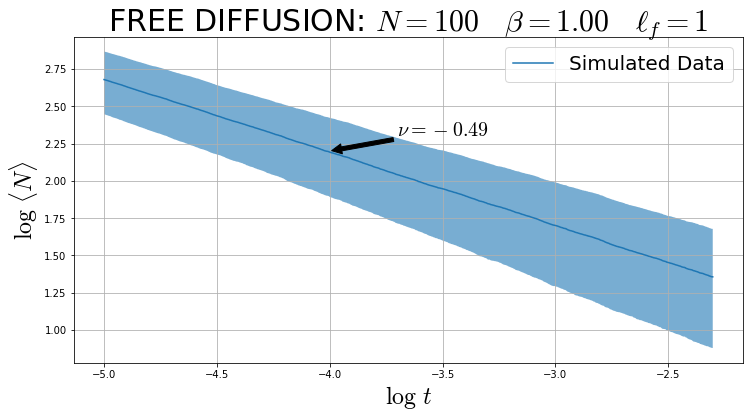

In [10]:
# Plot the partial data with the theoretical behaviour 
plt.figure(figsize=(12,6))

plt.plot(df_tail.log_t,df_tail.log_N,label='Simulated Data')

upper=np.log(df_tail['N_avg']+df_tail['std_N'])
lower=np.log(df_tail['N_avg']-df_tail['std_N'])
plt.fill_between(df_tail.log_t,upper,lower,alpha=0.6)
plt.annotate(r'$\nu=%.2f$'%nu_res, 
             xy=(-4.0, 2.2),
             xytext=(-3.7,2.3),
             xycoords='data',
             arrowprops=dict(arrowstyle="simple",facecolor='black'),
             fontsize=20)


plt.title(r'FREE DIFFUSION: $N=%i \quad \beta=%.2f \quad \ell_f=%g$'%(N,beta,s),fontsize=30)
plt.xlabel(r'$\log \ t$',fontsize=24)
plt.ylabel(r'$\log \ \langle N \rangle $',fontsize=24)

plt.grid(zorder=3)
plt.legend(fontsize=20)
plt.show()
plt.close()

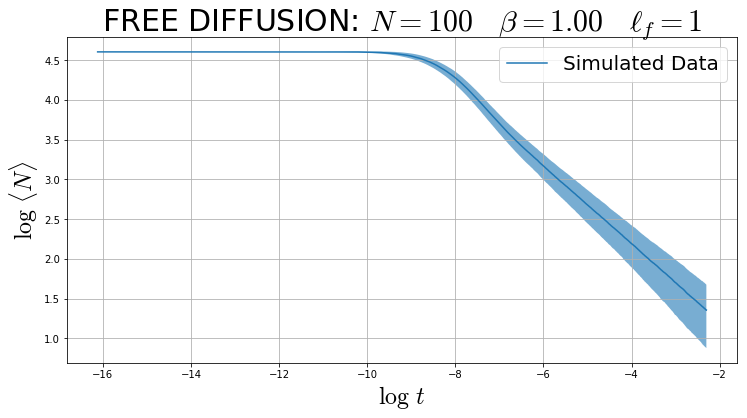

In [9]:
plt.figure(figsize=(12,6))

plt.plot(df.log_t,df.log_N,label='Simulated Data')

upper=np.log(df['N_avg']+df['std_N'])
lower=np.log(df['N_avg']-df['std_N'])
plt.fill_between(df.log_t,upper,lower,alpha=0.6)

plt.title(r'FREE DIFFUSION: $N=%i \quad \beta=%.2f \quad \ell_f=%g$'%(N,beta,s),fontsize=30)
plt.xlabel(r'$\log \ t$',fontsize=24)
plt.ylabel(r'$\log \ \langle N \rangle $',fontsize=24)

plt.grid(zorder=3)
plt.legend(fontsize=20)
plt.show()
plt.close()